# 1. IMPORTS AND SYNTHETIC DATA

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

np.random.seed(42)

# Create a student DataFrame with variation for correlation + grouping

In [19]:
n = 80 # number of students
students = [f"Student_{i}" for i in range(n)] # student names
departments = np.random.choice(["CS", "IT", "AI", "DS"], size=n, p=[0.4, 0.25, 0.2, 0.15]) # departments

# marks with trends + noise
x_idx = np.arange(n)
math = np.clip(60 + 12*np.sin(x_idx/4) + np.random.normal(0, 8, n), 0, 100)
science = np.clip(65 + 10*np.cos(x_idx/5) + np.random.normal(0, 7, n), 0, 100)
english = np.clip(55 + 15*np.sin(x_idx/6) + np.random.normal(0, 9, n), 0, 100)

# add "Credits" as weights for weighted averages
credits = np.random.choice([3, 4, 5], size=n, p=[0.5, 0.3, 0.2])

df = pd.DataFrame({
    "Student": students,
    "Department": departments,
    "Math": math,
    "Science": science,
    "English": english,
    "Credits": credits
})

print(df.head())

     Student Department       Math    Science    English  Credits
0  Student_0         CS  70.236149  77.353015  65.725367        5
1  Student_1         IT  45.234297  73.208332  56.734980        5
2  Student_2         CS  69.775065  68.443062  49.832005        3
3  Student_3         CS  48.233499  68.219590  58.649614        4
4  Student_4         IT  62.372333  86.315752  65.883799        3


# 2. UNDERSTANDING PLOTS
#    - Logarithmic plots
#    - Spectrograms
#    - Stem plots
#    - Streamlines of vector flow
# =====================================================================

# ---------------------------------------------------------------------
# 2.1 Logarithmic Plots (semilogx, semilogy, loglog)

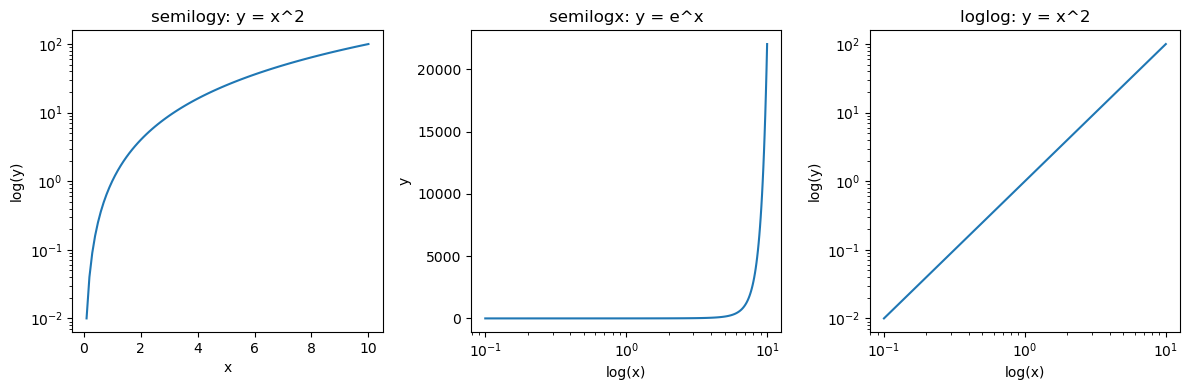

In [34]:
x = np.linspace(0.1, 10, 100)
y1 = x**2
y2 = np.exp(x)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.semilogy(x, y1)
plt.title("semilogy: y = x^2")
plt.xlabel("x")
plt.ylabel("log(y)")

plt.subplot(1, 3, 2)
plt.semilogx(x, y2)
plt.title("semilogx: y = e^x")
plt.xlabel("log(x)")
plt.ylabel("y")

plt.subplot(1, 3, 3)
plt.loglog(x, y1)
plt.title("loglog: y = x^2")
plt.xlabel("log(x)")
plt.ylabel("log(y)")

plt.tight_layout()
plt.show()

# 2.2 Spectrogram (time–frequency plot of a signal)

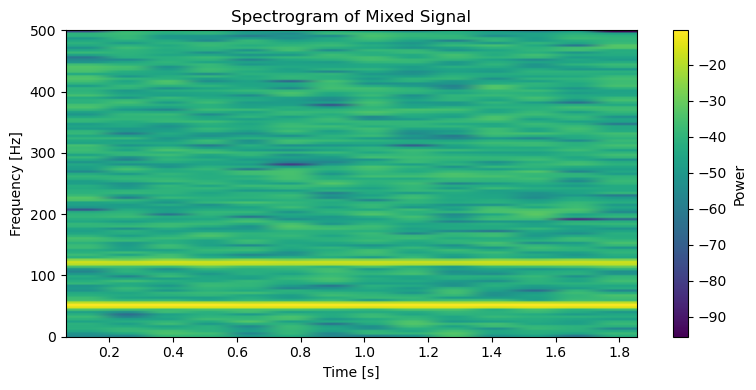

In [48]:
Fs = 1000  # sampling rate
t = np.linspace(0, 2, 2*Fs)
signal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t) + 0.2*np.random.randn(len(t))

plt.figure(figsize=(8, 4))
plt.specgram(signal, Fs=Fs, NFFT=256, noverlap=128, cmap="viridis")
plt.title("Spectrogram of Mixed Signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label="Power")
plt.tight_layout()
plt.show()

# 2.3 Stem Plot (discrete data)

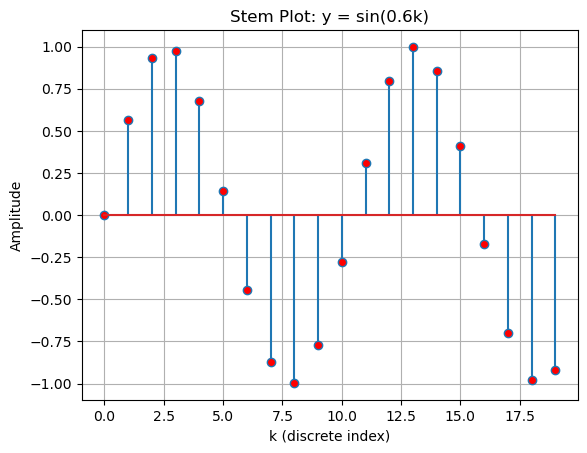

In [49]:
n_points = 20
k = np.arange(n_points)
y = np.sin(0.6 * k)

plt.figure()

markerline, stemlines, baseline = plt.stem(k, y)

# Customize markers
plt.setp(markerline, marker='o', markersize=6, markerfacecolor='red')

# Customize stem lines
plt.setp(stemlines, linewidth=1.5)

plt.title("Stem Plot: y = sin(0.6k)")
plt.xlabel("k (discrete index)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


# 2.4 Streamline of Vector Flow (vector field visualization)

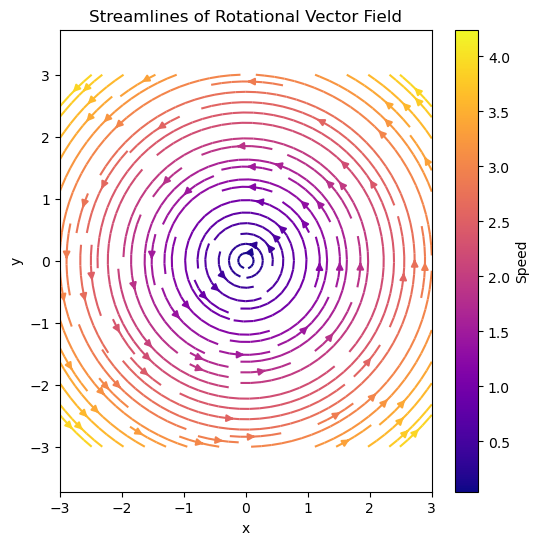

In [50]:
Y, X = np.mgrid[-3:3:100j, -3:3:100j]   # grid
U = -Y                                  # vector components
V = X

speed = np.sqrt(U**2 + V**2)

plt.figure(figsize=(6, 6))
plt.streamplot(X, Y, U, V, color=speed, cmap="plasma", density=1.2)
plt.title("Streamlines of Rotational Vector Field")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Speed")
plt.axis("equal")
plt.show()

# 3. USING COLORMAPS
#    - Different colormaps
#    - Colorbars
#    - Logarithmic normalization
# ==================================

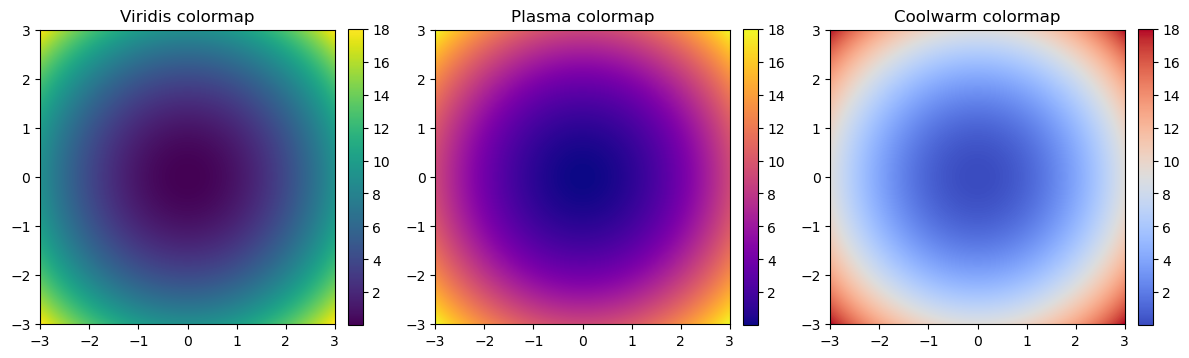

In [51]:
# Use simple function z = x^2 + y^2 for visualization
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + 1e-3  # avoid exact zero for LogNorm

plt.figure(figsize=(12, 4))
# ---------------------------------------------------------------------
# 3.1 Different built-in colormaps
# ---------------------------------------------------------------------
plt.subplot(1, 3, 1)
im1 = plt.imshow(Z, cmap="viridis", origin="lower", extent=[-3,3,-3,3])
plt.title("Viridis colormap")
plt.colorbar(im1, fraction=0.046, pad=0.04)

plt.subplot(1, 3, 2)
im2 = plt.imshow(Z, cmap="plasma", origin="lower", extent=[-3,3,-3,3])
plt.title("Plasma colormap")
plt.colorbar(im2, fraction=0.046, pad=0.04)

plt.subplot(1, 3, 3)
im3 = plt.imshow(Z, cmap="coolwarm", origin="lower", extent=[-3,3,-3,3])
plt.title("Coolwarm colormap")
plt.colorbar(im3, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# 3.2 Logarithmic normalization with colormap

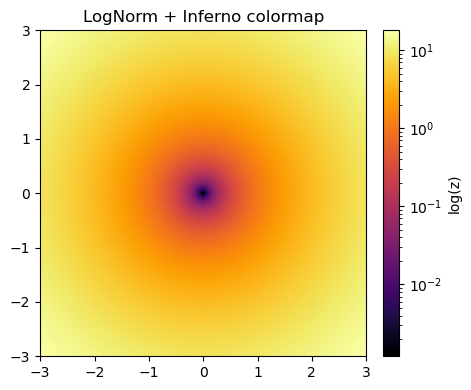

In [52]:
plt.figure(figsize=(5, 4))
im = plt.imshow(Z, cmap="inferno", norm=LogNorm(), origin="lower", extent=[-3,3,-3,3])
plt.title("LogNorm + Inferno colormap")
plt.colorbar(im, fraction=0.046, pad=0.04, label="log(z)")
plt.tight_layout()
plt.show()

# 4. PLOTTING CORRELATION
#    - Scatter relationships
#    - Cross-correlation
#    - Autocorrelation

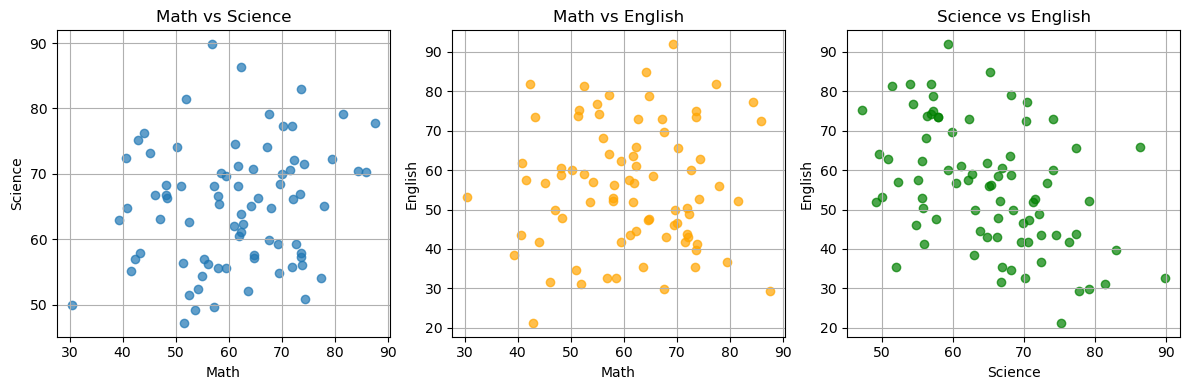

Correlation matrix of marks:
             Math   Science   English
Math     1.000000  0.178991  0.028275
Science  0.178991  1.000000 -0.447704
English  0.028275 -0.447704  1.000000


In [53]:
# 4.1 Scatter plot relationships (Math vs Science vs English)
# ---------------------------------------------------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df["Math"], df["Science"], alpha=0.7)
plt.title("Math vs Science")
plt.xlabel("Math")
plt.ylabel("Science")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(df["Math"], df["English"], alpha=0.7, color="orange")
plt.title("Math vs English")
plt.xlabel("Math")
plt.ylabel("English")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(df["Science"], df["English"], alpha=0.7, color="green")
plt.title("Science vs English")
plt.xlabel("Science")
plt.ylabel("English")
plt.grid(True)

plt.tight_layout()
plt.show()

print("Correlation matrix of marks:")
print(df[["Math", "Science", "English"]].corr())

# ---------------------------------------------------------------------
# 4.2 Cross-correlation between two signals
# ---------------------------------------------------------------------
# Create two noisy signals with a relationship

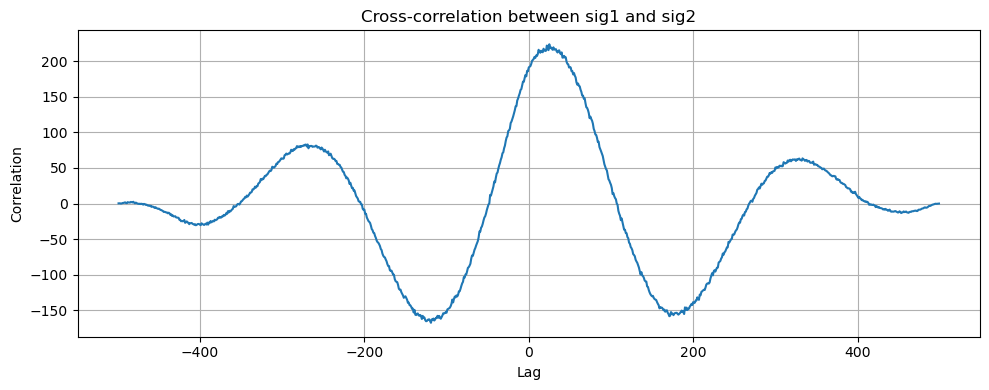

In [54]:
t = np.linspace(0, 10, 500)
sig1 = np.sin(t) + 0.3*np.random.randn(len(t))
sig2 = np.cos(t - 1.0) + 0.3*np.random.randn(len(t))  # shifted relationship

cross_corr = np.correlate(sig1 - sig1.mean(), sig2 - sig2.mean(), mode="full")
lags = np.arange(-len(sig1)+1, len(sig1))

plt.figure(figsize=(10, 4))
plt.plot(lags, cross_corr)
plt.title("Cross-correlation between sig1 and sig2")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()


# ---------------------------------------------------------------------
# 4.3 Autocorrelation of a signal
# ---------------------------------------------------------------------

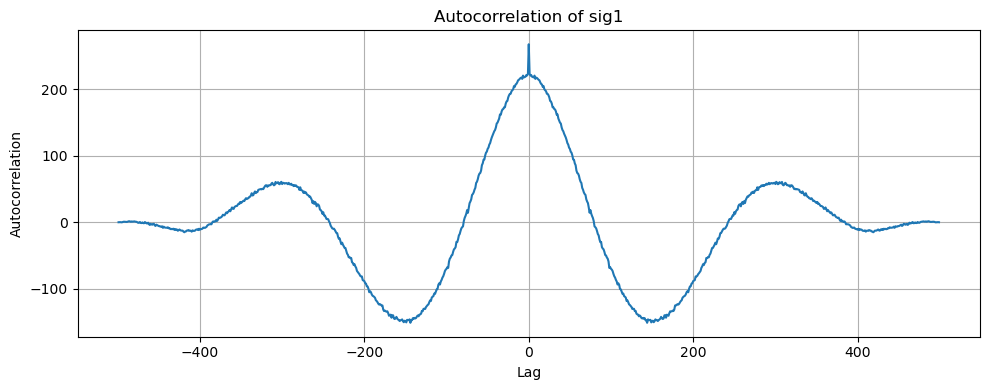

In [55]:
auto_corr = np.correlate(sig1 - sig1.mean(), sig1 - sig1.mean(), mode="full")
lags = np.arange(-len(sig1)+1, len(sig1))

plt.figure(figsize=(10, 4))
plt.plot(lags, auto_corr)
plt.title("Autocorrelation of sig1")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.tight_layout()
plt.show()

# =====================================================================
# 5. APPLICATION: GROUP OPERATIONS & DATA AGGREGATION (PANDAS)
#    - Random sampling and permutation
#    - Groupwise linear regression
#    - Filling missing values with group-specific values
#    - Group weighted average and correlation
# =====================================================================

# ---------------------------------------------------------------------
# 5.1 Random sampling and permutation
# ---------------------------------------------------------------------

In [56]:
print("\nRandom sample of 5 students:")
print(df.sample(5, random_state=1))

print("\nPermutation of index (first 10):")
perm_indices = np.random.permutation(df.index)
print(perm_indices[:10])


Random sample of 5 students:
       Student Department       Math    Science    English  Credits
63  Student_63         AI  70.146420  69.897806  46.496083        5
27  Student_27         AI  67.905586  64.711680  43.105562        3
31  Student_31         IT  71.648581  70.536136  41.876350        3
69  Student_69         AI  40.659946  72.441103  43.474507        3
46  Student_46         CS  57.161660  49.574558  64.139304        3

Permutation of index (first 10):
[23 52 67 27 75 62 49 51  0 66]


# ---------------------------------------------------------------------
# 5.2 Add some missing values to demonstrate filling by groups
# ---------------------------------------------------------------------

In [57]:
df_with_nan = df.copy()
nan_indices = np.random.choice(df_with_nan.index, size=10, replace=False)
df_with_nan.loc[nan_indices, "Math"] = np.nan

print("\nNumber of missing Math values before fill:", df_with_nan["Math"].isna().sum())

# Fill missing Math marks with group-specific (Department-wise) means
group_means = df_with_nan.groupby("Department")["Math"].transform("mean")
df_with_nan["Math"] = df_with_nan["Math"].fillna(group_means)

print("Number of missing Math values after fill:", df_with_nan["Math"].isna().sum())


Number of missing Math values before fill: 10
Number of missing Math values after fill: 0


# ---------------------------------------------------------------------
# 5.3 Groupwise linear regression (simple: Math ~ Science within each department)
# ---------------------------------------------------------------------

In [58]:
def simple_linear_regression(x, y):
    """
    Returns slope and intercept for y = a*x + b using least squares.
    """
    A = np.vstack([x, np.ones_like(x)]).T
    a, b = np.linalg.lstsq(A, y, rcond=None)[0]
    return a, b

print("\nGroupwise linear regression: Math ~ Science")
for dept, group in df.groupby("Department"):
    a, b = simple_linear_regression(group["Science"].values, group["Math"].values)
    print(f"{dept}:  Math ≈ {a:.2f} * Science + {b:.2f}")



Groupwise linear regression: Math ~ Science
AI:  Math ≈ -0.50 * Science + 92.12
CS:  Math ≈ 0.22 * Science + 44.86
DS:  Math ≈ 0.44 * Science + 36.15
IT:  Math ≈ 0.36 * Science + 38.72


# ---------------------------------------------------------------------
# 5.4 Group weighted average of Math (weights = Credits)
# ---------------------------------------------------------------------

In [59]:
def weighted_avg(values, weights):
    return np.sum(values * weights) / np.sum(weights)

weighted_math = (
    df.groupby("Department")
      .apply(lambda g: weighted_avg(g["Math"], g["Credits"]))
)

print("\nWeighted average Math mark per Department (weights = Credits):")
print(weighted_math)


Weighted average Math mark per Department (weights = Credits):
Department
AI    61.369811
CS    59.489737
DS    66.119608
IT    63.357709
dtype: float64


C:\Users\shaha\AppData\Local\Temp\ipykernel_18804\3843649136.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: weighted_avg(g["Math"], g["Credits"]))


# ---------------------------------------------------------------------
# 5.5 Group-level correlation (Math vs Science per Department)
# ---------------------------------------------------------------------

In [60]:
print("\nCorrelation between Math and Science within each Department:")
for dept, group in df.groupby("Department"):
    corr = group["Math"].corr(group["Science"])
    print(f"{dept}: correlation = {corr:.3f}")


Correlation between Math and Science within each Department:
AI: correlation = -0.326
CS: correlation = 0.194
DS: correlation = 0.304
IT: correlation = 0.231
